In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

from scripts.dataset_loader import get_dataloader
from scripts.resnet_model import get_resnet18

In [ ]:
epochs = 50
lr = 0.001
batch_size = 64

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader, val_loader, _, class_names = get_dataloader(train_dir="data_split/train", val_dir="data_split/val", test_dir="data_split/test", batch_size=batch_size)

model = get_resnet18(num_classes=len(class_names)).to(device)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=lr)

In [6]:
train_losses, val_losses = [], []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        train_preds = outputs.argmax(dim=1)
        train_correct += (train_preds == labels).sum().item()
        train_total += labels.size(0)

    train_acc = train_correct / train_total
    train_loss /= train_total
    train_losses.append(train_loss)

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            val_preds = outputs.argmax(dim=1)
            val_correct += (val_preds == labels).sum().item()
            val_total += labels.size(0)

        val_acc = val_correct / val_total
        val_loss /= val_total
        val_losses.append(val_loss)

        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

Epoch 9/50: 100%|██████████| 11/11 [00:22<00:00,  2.06s/it]


Train Loss: 1.0208, Train Acc: 0.6763


Epoch 9/50: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


Val Loss: 1.0620, Val Acc: 0.6000


Epoch 10/50: 100%|██████████| 11/11 [00:21<00:00,  1.95s/it]


Train Loss: 0.9863, Train Acc: 0.6792


Epoch 10/50: 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]


Val Loss: 1.0025, Val Acc: 0.6839


Epoch 11/50: 100%|██████████| 11/11 [00:20<00:00,  1.87s/it]


Train Loss: 0.9178, Train Acc: 0.7344


Epoch 11/50: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]


Val Loss: 0.9953, Val Acc: 0.6065


Epoch 12/50: 100%|██████████| 11/11 [00:21<00:00,  1.92s/it]


Train Loss: 0.9060, Train Acc: 0.7010


Epoch 12/50: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


Val Loss: 0.9404, Val Acc: 0.6774


Epoch 13/50: 100%|██████████| 11/11 [00:20<00:00,  1.89s/it]


Train Loss: 0.8719, Train Acc: 0.7591


Epoch 13/50: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Val Loss: 0.9368, Val Acc: 0.6968


Epoch 14/50: 100%|██████████| 11/11 [00:24<00:00,  2.21s/it]


Train Loss: 0.8441, Train Acc: 0.7562


Epoch 14/50: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]


Val Loss: 0.9161, Val Acc: 0.6581


Epoch 15/50: 100%|██████████| 11/11 [00:28<00:00,  2.57s/it]


Train Loss: 0.8157, Train Acc: 0.7504


Epoch 15/50: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]


Val Loss: 0.9033, Val Acc: 0.6710


Epoch 16/50: 100%|██████████| 11/11 [00:24<00:00,  2.23s/it]


Train Loss: 0.7970, Train Acc: 0.7649


Epoch 16/50: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]


Val Loss: 0.8930, Val Acc: 0.6774


Epoch 17/50: 100%|██████████| 11/11 [00:23<00:00,  2.18s/it]


Train Loss: 0.7893, Train Acc: 0.7431


Epoch 17/50: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]


Val Loss: 0.8626, Val Acc: 0.7097


Epoch 18/50: 100%|██████████| 11/11 [00:27<00:00,  2.46s/it]


Train Loss: 0.7896, Train Acc: 0.7562


Epoch 18/50: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]


Val Loss: 0.8953, Val Acc: 0.6516


Epoch 19/50: 100%|██████████| 11/11 [00:21<00:00,  1.99s/it]


Train Loss: 0.7815, Train Acc: 0.7504


Epoch 19/50: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


Val Loss: 0.8332, Val Acc: 0.7032


Epoch 20/50: 100%|██████████| 11/11 [00:21<00:00,  1.91s/it]


Train Loss: 0.7438, Train Acc: 0.7663


Epoch 20/50: 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]


Val Loss: 0.8838, Val Acc: 0.6645


Epoch 21/50: 100%|██████████| 11/11 [00:22<00:00,  2.01s/it]


Train Loss: 0.7283, Train Acc: 0.7750


Epoch 21/50: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]


Val Loss: 0.8212, Val Acc: 0.6968


Epoch 22/50: 100%|██████████| 11/11 [00:23<00:00,  2.16s/it]


Train Loss: 0.7115, Train Acc: 0.7808


Epoch 22/50: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]


Val Loss: 0.8185, Val Acc: 0.6903


Epoch 23/50: 100%|██████████| 11/11 [00:24<00:00,  2.20s/it]


Train Loss: 0.7005, Train Acc: 0.7997


Epoch 23/50: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]


Val Loss: 0.8170, Val Acc: 0.6839


Epoch 24/50: 100%|██████████| 11/11 [00:24<00:00,  2.21s/it]


Train Loss: 0.6983, Train Acc: 0.7823


Epoch 24/50: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]


Val Loss: 0.8006, Val Acc: 0.7097


Epoch 25/50: 100%|██████████| 11/11 [00:20<00:00,  1.90s/it]


Train Loss: 0.6859, Train Acc: 0.7939


Epoch 25/50: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]


Val Loss: 0.7953, Val Acc: 0.6903


Epoch 26/50: 100%|██████████| 11/11 [00:21<00:00,  1.95s/it]


Train Loss: 0.6497, Train Acc: 0.8070


Epoch 26/50: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


Val Loss: 0.7912, Val Acc: 0.7097


Epoch 27/50: 100%|██████████| 11/11 [00:22<00:00,  2.00s/it]


Train Loss: 0.6631, Train Acc: 0.7925


Epoch 27/50: 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]


Val Loss: 0.7851, Val Acc: 0.7032


Epoch 28/50: 100%|██████████| 11/11 [00:23<00:00,  2.14s/it]


Train Loss: 0.6497, Train Acc: 0.8157


Epoch 28/50: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]


Val Loss: 0.7838, Val Acc: 0.6968


Epoch 29/50: 100%|██████████| 11/11 [00:21<00:00,  1.93s/it]


Train Loss: 0.6275, Train Acc: 0.8186


Epoch 29/50: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]


Val Loss: 0.7632, Val Acc: 0.7097


Epoch 30/50: 100%|██████████| 11/11 [00:20<00:00,  1.91s/it]


Train Loss: 0.6148, Train Acc: 0.8113


Epoch 30/50: 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]


Val Loss: 0.7720, Val Acc: 0.7097


Epoch 31/50: 100%|██████████| 11/11 [00:20<00:00,  1.91s/it]


Train Loss: 0.6362, Train Acc: 0.8142


Epoch 31/50: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]


Val Loss: 0.7661, Val Acc: 0.7161


Epoch 32/50: 100%|██████████| 11/11 [00:21<00:00,  1.99s/it]


Train Loss: 0.6158, Train Acc: 0.8142


Epoch 32/50: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]


Val Loss: 0.7672, Val Acc: 0.6903


Epoch 33/50: 100%|██████████| 11/11 [00:22<00:00,  2.04s/it]


Train Loss: 0.5981, Train Acc: 0.8215


Epoch 33/50: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]


Val Loss: 0.7444, Val Acc: 0.7032


Epoch 34/50: 100%|██████████| 11/11 [00:25<00:00,  2.29s/it]


Train Loss: 0.5904, Train Acc: 0.8012


Epoch 34/50: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]


Val Loss: 0.7465, Val Acc: 0.7161


Epoch 35/50: 100%|██████████| 11/11 [00:25<00:00,  2.29s/it]


Train Loss: 0.6040, Train Acc: 0.8026


Epoch 35/50: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]


Val Loss: 0.7444, Val Acc: 0.7032


Epoch 36/50: 100%|██████████| 11/11 [00:24<00:00,  2.22s/it]


Train Loss: 0.5658, Train Acc: 0.8360


Epoch 36/50: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


Val Loss: 0.7395, Val Acc: 0.7161


Epoch 37/50: 100%|██████████| 11/11 [00:22<00:00,  2.06s/it]


Train Loss: 0.5823, Train Acc: 0.8374


Epoch 37/50: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]


Val Loss: 0.7354, Val Acc: 0.7161


Epoch 38/50: 100%|██████████| 11/11 [00:22<00:00,  2.09s/it]


Train Loss: 0.5947, Train Acc: 0.8186


Epoch 38/50: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]


Val Loss: 0.7384, Val Acc: 0.7097


Epoch 39/50: 100%|██████████| 11/11 [00:25<00:00,  2.30s/it]


Train Loss: 0.5411, Train Acc: 0.8433


Epoch 39/50: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]


Val Loss: 0.7336, Val Acc: 0.7226


Epoch 40/50: 100%|██████████| 11/11 [00:24<00:00,  2.20s/it]


Train Loss: 0.5690, Train Acc: 0.8316


Epoch 40/50: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]


Val Loss: 0.7470, Val Acc: 0.7226


Epoch 41/50: 100%|██████████| 11/11 [00:23<00:00,  2.13s/it]


Train Loss: 0.5359, Train Acc: 0.8360


Epoch 41/50: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]


Val Loss: 0.7213, Val Acc: 0.7032


Epoch 42/50: 100%|██████████| 11/11 [00:24<00:00,  2.21s/it]


Train Loss: 0.5747, Train Acc: 0.8171


Epoch 42/50: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]


Val Loss: 0.7476, Val Acc: 0.7032


Epoch 43/50: 100%|██████████| 11/11 [00:24<00:00,  2.24s/it]


Train Loss: 0.5689, Train Acc: 0.8142


Epoch 43/50: 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]


Val Loss: 0.7146, Val Acc: 0.7161


Epoch 44/50: 100%|██████████| 11/11 [00:22<00:00,  2.05s/it]


Train Loss: 0.5190, Train Acc: 0.8403


Epoch 44/50: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]


Val Loss: 0.7406, Val Acc: 0.7097


Epoch 45/50: 100%|██████████| 11/11 [00:23<00:00,  2.18s/it]


Train Loss: 0.5397, Train Acc: 0.8505


Epoch 45/50: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]


Val Loss: 0.7194, Val Acc: 0.7161


Epoch 46/50: 100%|██████████| 11/11 [00:25<00:00,  2.32s/it]


Train Loss: 0.5312, Train Acc: 0.8316


Epoch 46/50: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]


Val Loss: 0.7250, Val Acc: 0.7032


Epoch 47/50: 100%|██████████| 11/11 [00:20<00:00,  1.89s/it]


Train Loss: 0.5527, Train Acc: 0.8186


Epoch 47/50: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]


Val Loss: 0.7334, Val Acc: 0.7161


Epoch 48/50: 100%|██████████| 11/11 [00:23<00:00,  2.13s/it]


Train Loss: 0.5136, Train Acc: 0.8331


Epoch 48/50: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]


Val Loss: 0.7101, Val Acc: 0.7161


Epoch 49/50: 100%|██████████| 11/11 [00:25<00:00,  2.28s/it]


Train Loss: 0.5269, Train Acc: 0.8273


Epoch 49/50: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]


Val Loss: 0.7310, Val Acc: 0.6903


Epoch 50/50: 100%|██████████| 11/11 [00:21<00:00,  2.00s/it]


Train Loss: 0.5375, Train Acc: 0.8142


Epoch 50/50: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]

Val Loss: 0.7192, Val Acc: 0.7097


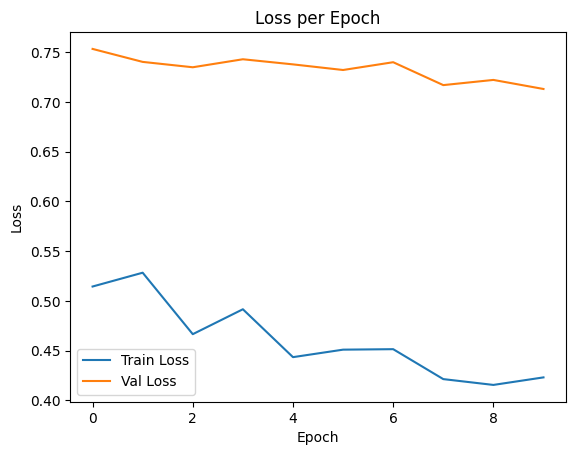

In [11]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss per Epoch")
plt.show()

In [9]:
os.makedirs("models", exist_ok=True)
torch.save(model.state_dict(), "models/car_resnet18_model.pth")